In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer()
X_tfidf=tfidf_vectorizer.fit_transform([preprocessed_text])
tfidf_vocabulary=tfidf_vectorizer.get_feature_names_out()
tfidf_array=X_tfidf.toarray()
print("TF-IDF Vocabulary:",tfidf_vocabulary)
print("\nTF-IDF Array:",tfidf_array)

NameError: name 'preprocessed_text' is not defined

           and      data        ai        in       the       can        to  \
and   1.000000  0.079648  0.044543 -0.045412  0.039704  0.065634  0.110171   
data  0.079648  1.000000  0.035745  0.093188  0.037531  0.084567 -0.055793   
ai    0.044543  0.035745  1.000000  0.026093  0.205998  0.128224  0.192017   
in   -0.045412  0.093188  0.026093  1.000000 -0.022078  0.178686  0.072429   
the   0.039704  0.037531  0.205998 -0.022078  1.000000  0.184907  0.071497   

            of   science  processing  ...   quickly  subfield  advancing  \
and   0.178572  0.108991    0.261307  ... -0.009463 -0.012079   0.046510   
data -0.047609  0.084158   -0.061555  ...  0.048181 -0.105766  -0.165149   
ai    0.059127  0.241131    0.003318  ... -0.117680 -0.106827  -0.048750   
in    0.029845  0.106095   -0.147743  ...  0.090698  0.064079   0.085178   
the   0.018542 -0.030089   -0.146317  ...  0.050466 -0.005310  -0.100427   

      analytical  higherlevel     focus  scientists  interaction  required

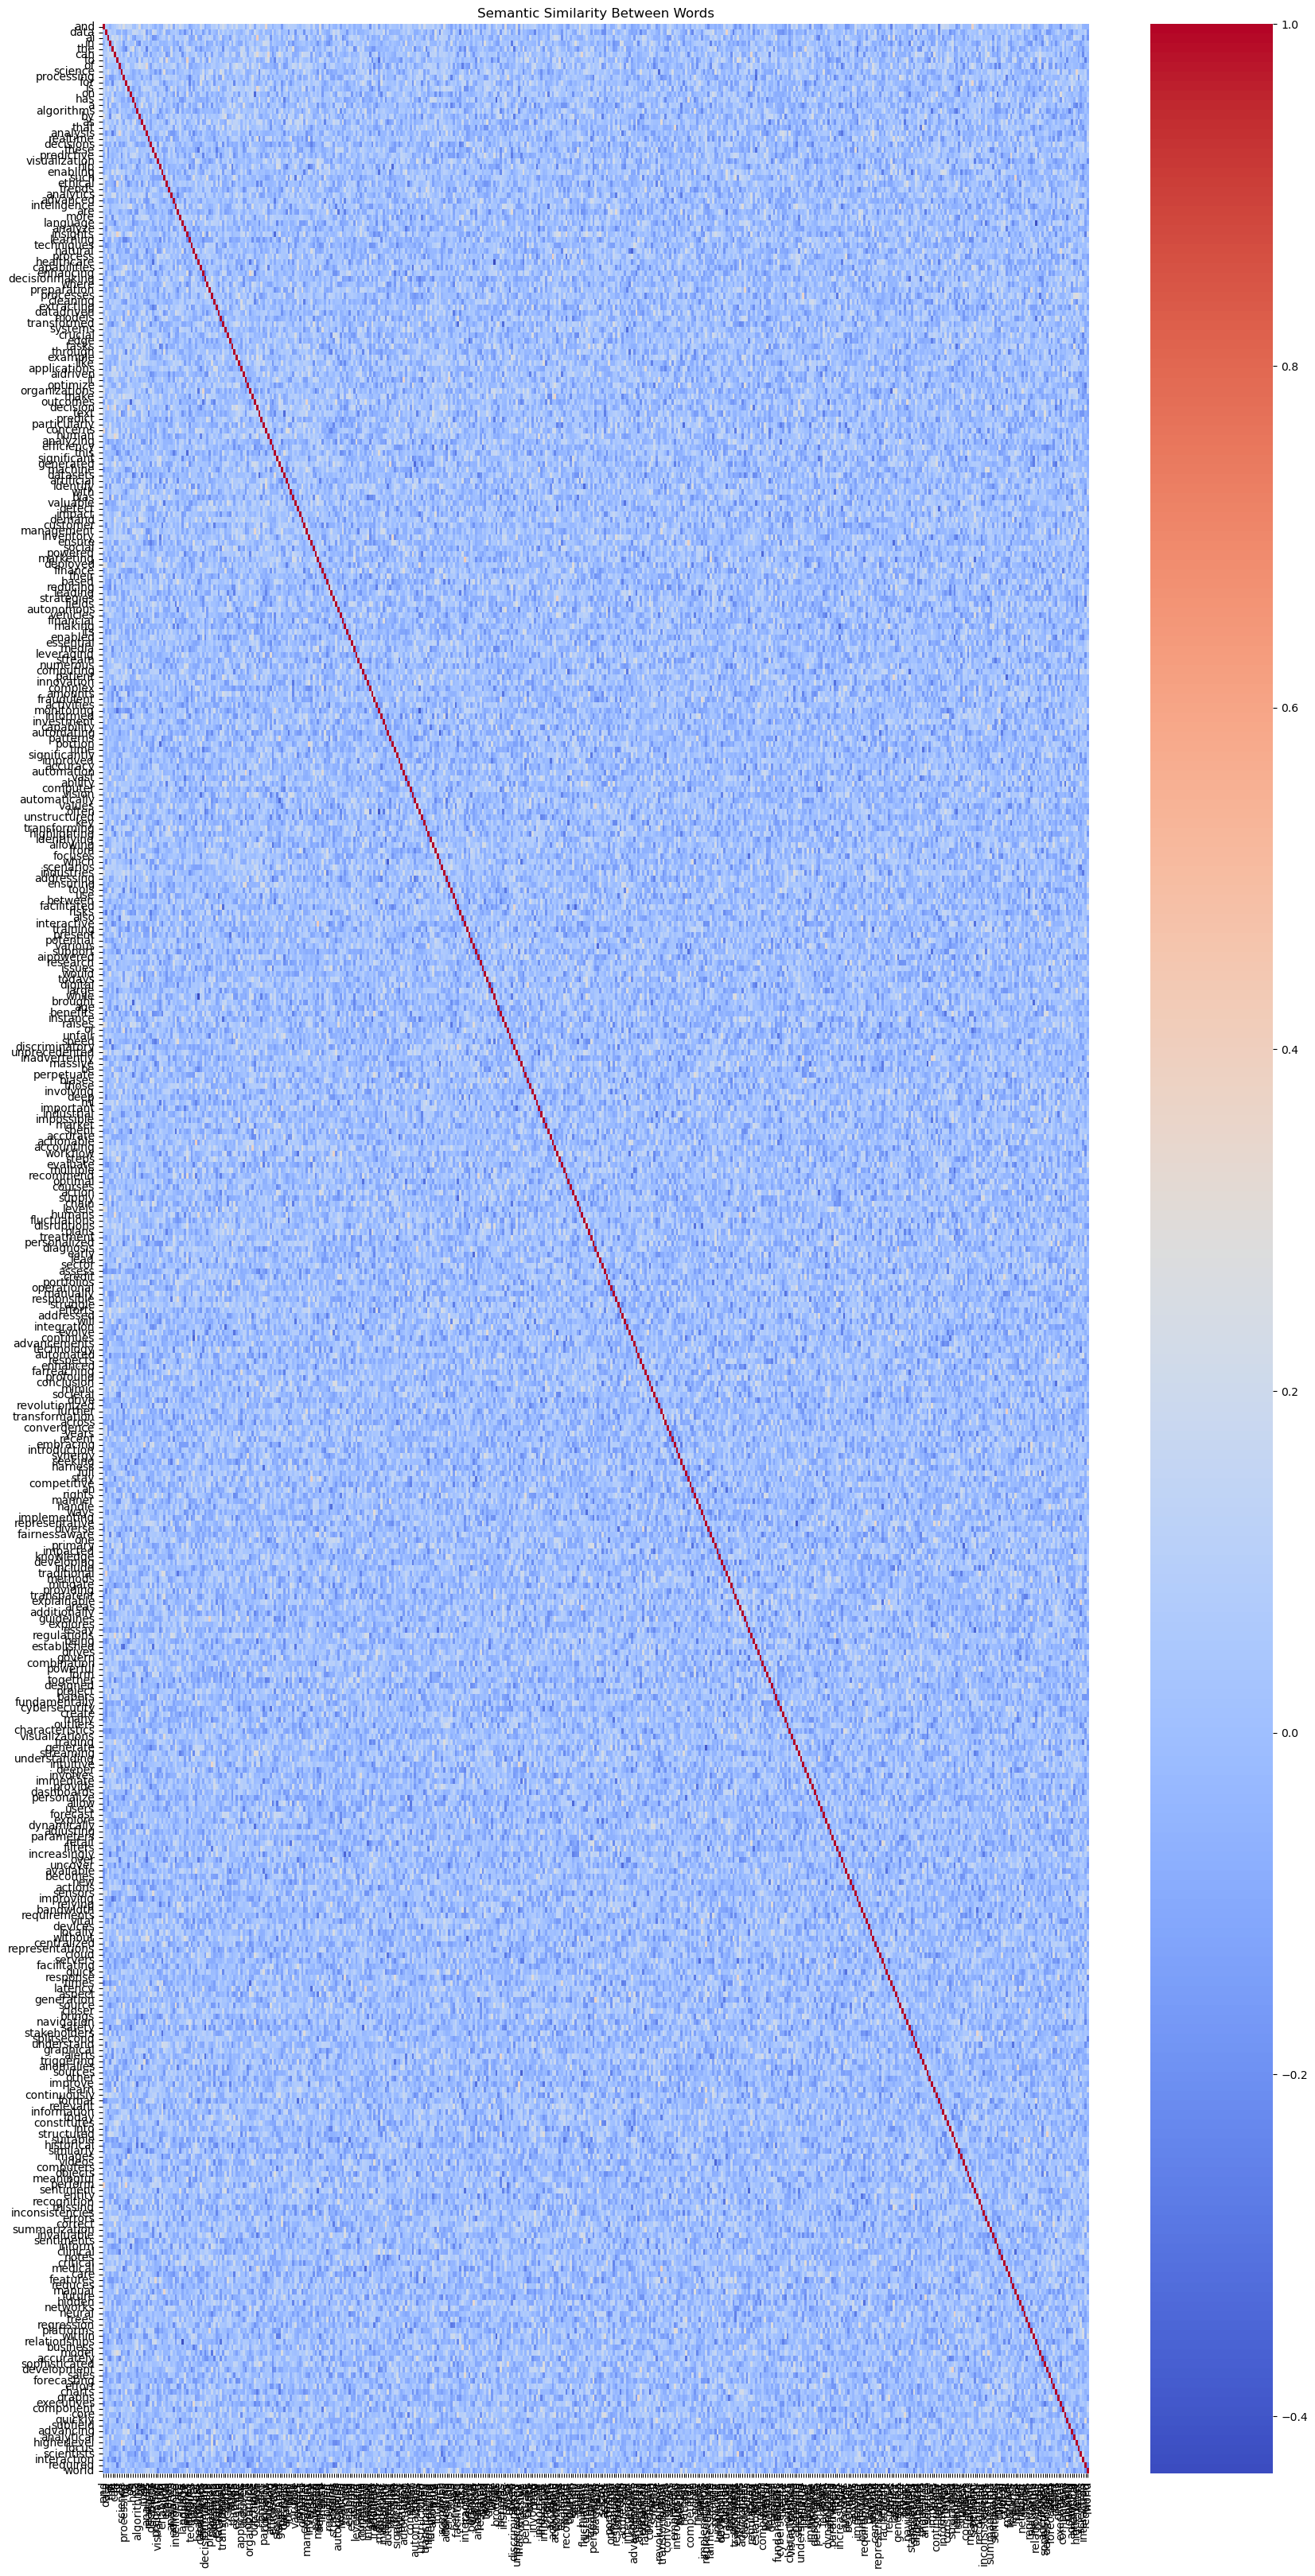

In [11]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Load the dataset
file_path = 'text3.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Preprocessing: convert to lowercase, remove special characters, and tokenize
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    tokens = word_tokenize(text)  # Tokenize the text
    return tokens

# Tokenize and preprocess the dataset
tokens = preprocess(text)

# Train Word2Vec model
model = Word2Vec(sentences=[tokens], vector_size=100, window=5, min_count=1, sg=0)  # sg=0 for CBOW

# Get the list of all unique words in the vocabulary
vocab = list(model.wv.index_to_key)

# Initialize a matrix to store similarity scores
similarity_matrix = np.zeros((len(vocab), len(vocab)))

# Compute pairwise similarity for all words in the vocabulary
for i, word1 in enumerate(vocab):
    for j, word2 in enumerate(vocab):
        similarity_matrix[i, j] = model.wv.similarity(word1, word2)

# Convert similarity matrix into a pandas DataFrame for easy visualization
similarity_df = pd.DataFrame(similarity_matrix, index=vocab, columns=vocab)

# Display the first few rows of the similarity matrix
print(similarity_df.head())

# Plot heatmap of the similarity matrix
plt.figure(figsize=(20, 40))
sns.heatmap(similarity_df, cmap="coolwarm", annot=False, xticklabels=True, yticklabels=True)
plt.title("Semantic Similarity Between Words")
plt.show()


          the         i         a        of       and        to        in  \
the  1.000000  0.490796  0.473840  0.419434  0.439489  0.443688  0.494520   
i    0.490796  1.000000  0.428719  0.447922  0.391183  0.427188  0.369780   
a    0.473840  0.428719  1.000000  0.411838  0.503731  0.446238  0.509679   
of   0.419434  0.447922  0.411838  1.000000  0.342813  0.486920  0.443372   
and  0.439489  0.391183  0.503731  0.342813  1.000000  0.469928  0.412000   

           my       was      that  ...  articles     lying     small  \
the  0.535441  0.451974  0.476275  ... -0.007214  0.075026 -0.049205   
i    0.366289  0.412370  0.230792  ...  0.143584  0.112561  0.009698   
a    0.427506  0.508625  0.291798  ...  0.128670  0.202179  0.017305   
of   0.406918  0.421692  0.164657  ...  0.050076  0.070054  0.033430   
and  0.375203  0.309821  0.152945  ...  0.197664  0.071157 -0.021538   

       gloves      size  stockings  babyclothes     linen    soiled    secret  
the -0.043758  0.135969 

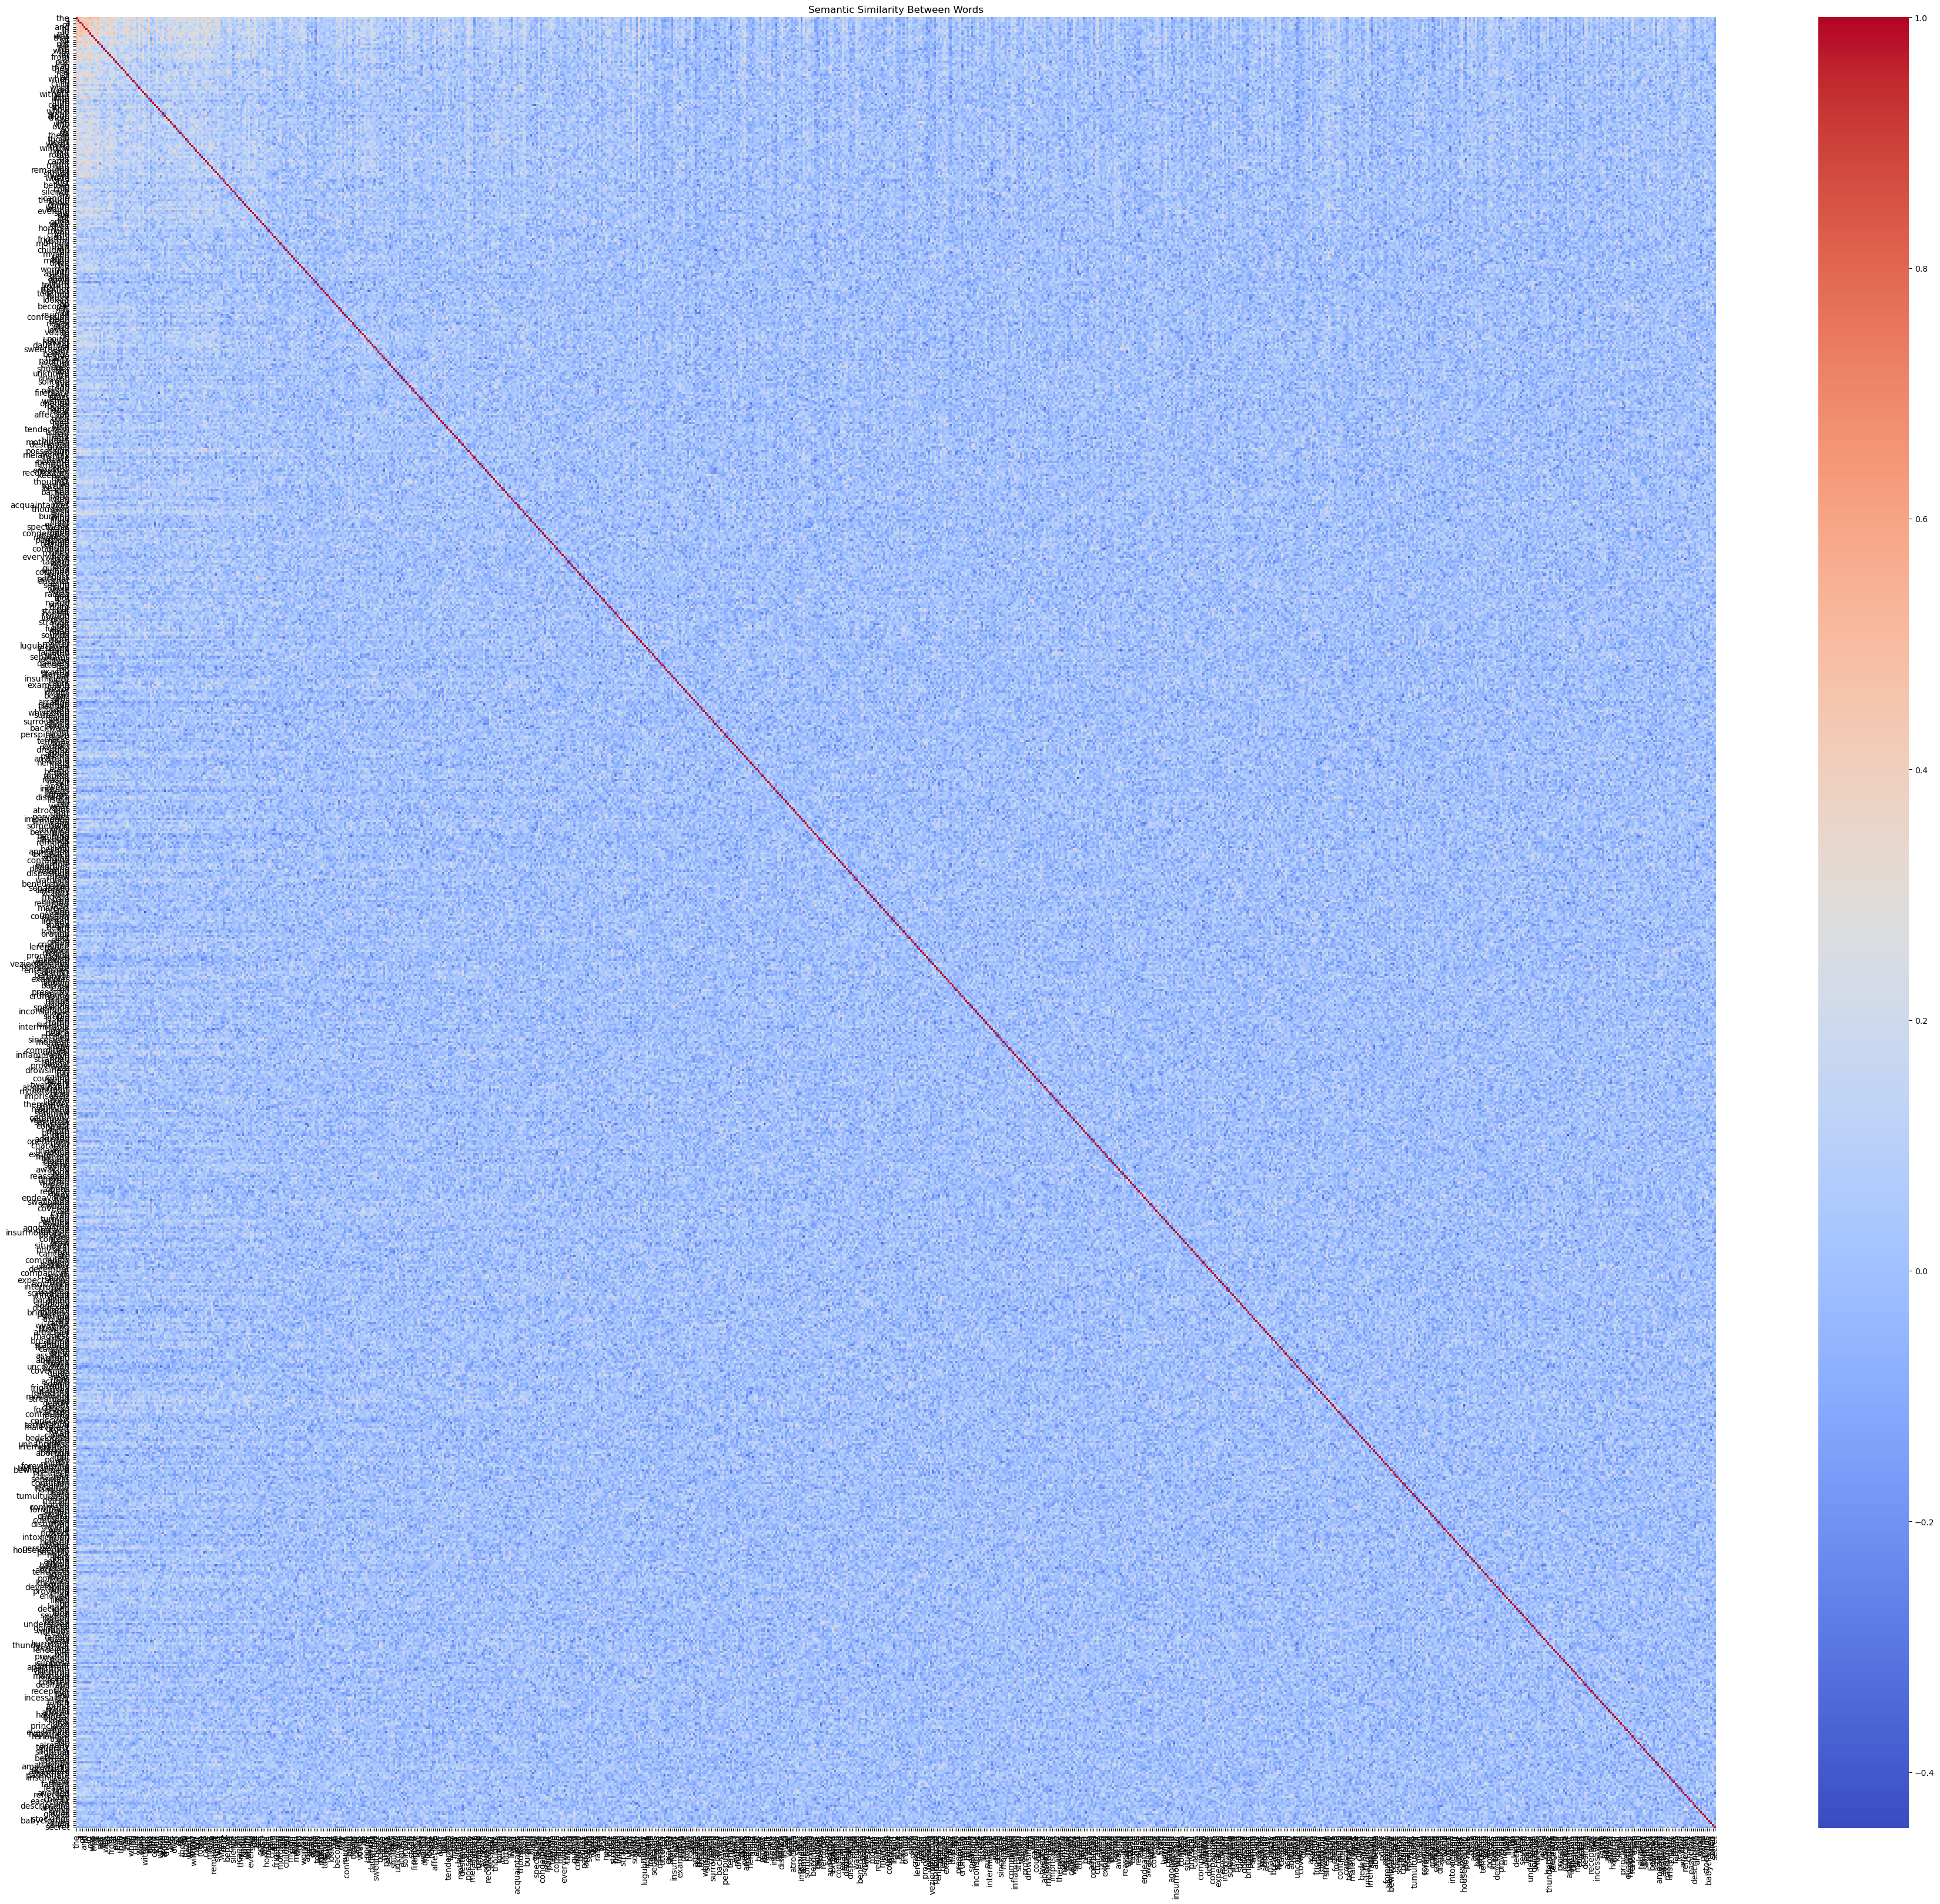

In [21]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Load the dataset
file_path = 'story.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Preprocessing: convert to lowercase, remove special characters, and tokenize
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    tokens = word_tokenize(text)  # Tokenize the text
    return tokens

# Tokenize and preprocess the dataset
tokens = preprocess(text)

# Train Word2Vec model
model = Word2Vec(sentences=[tokens], vector_size=100, window=5, min_count=1, sg=0)  # sg=0 for CBOW

# Get the list of all unique words in the vocabulary
vocab = list(model.wv.index_to_key)

# Initialize a matrix to store similarity scores
similarity_matrix = np.zeros((len(vocab), len(vocab)))

# Compute pairwise similarity for all words in the vocabulary
for i, word1 in enumerate(vocab):
    for j, word2 in enumerate(vocab):
        similarity_matrix[i, j] = model.wv.similarity(word1, word2)

# Convert similarity matrix into a pandas DataFrame for easy visualization
similarity_df = pd.DataFrame(similarity_matrix, index=vocab, columns=vocab)

# Display the first few rows of the similarity matrix
print(similarity_df.head())

# Plot heatmap of the similarity matrix
plt.figure(figsize=(45,40))
sns.heatmap(similarity_df, cmap="coolwarm", annot=False, xticklabels=True, yticklabels=True)
plt.title("Semantic Similarity Between Words")
plt.show()
